<a href="https://colab.research.google.com/github/agungfradiansyah12/MesingLearning/blob/main/jb14MesinLearningCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 1**

## Langkah 1 - Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Langkah 2 - Pra Pengolahan Data

### Langkah 2.1. Pra Pengolahan Data Training

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/SMT5/MESIN/jb14/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Langkah 2.2. Pra Pengolahan Data Testing

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/SMT5/MESIN/jb14/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Langkah 3 - Pembuatan Model CNN

### Langkah 3.1.  - Inisiasi Model CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Langkah 3.2. - Pembuatan Layer Konvolusi 1

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Langkah 3.3 - Pembuatan Layer Pooling 1

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Langkah 3.5 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Langkah 3.6 - Fully Connected Layer 1 (Input)

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Langkah 3.7 - Fully Connected Layer 2 (Output)

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Langkah 3.8 - Compile Model CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Langkah 4 - Fit CNN

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
158/250 ━━━━━━━━━━━━━━━━━━━━ 5:34 4s/step - accuracy: 0.5169 - loss: 0.7184

KeyboardInterrupt: 

## Langkah 5 - Prediksi dengan 1 Citra

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/SMT5/MESIN/jb14/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

# **praktikum 2**

## Langkah 1 - Load Library

In [14]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Langkah 2 - Unduh Dataset CIFAR

In [15]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Langkah 3 - Verifikasi Data

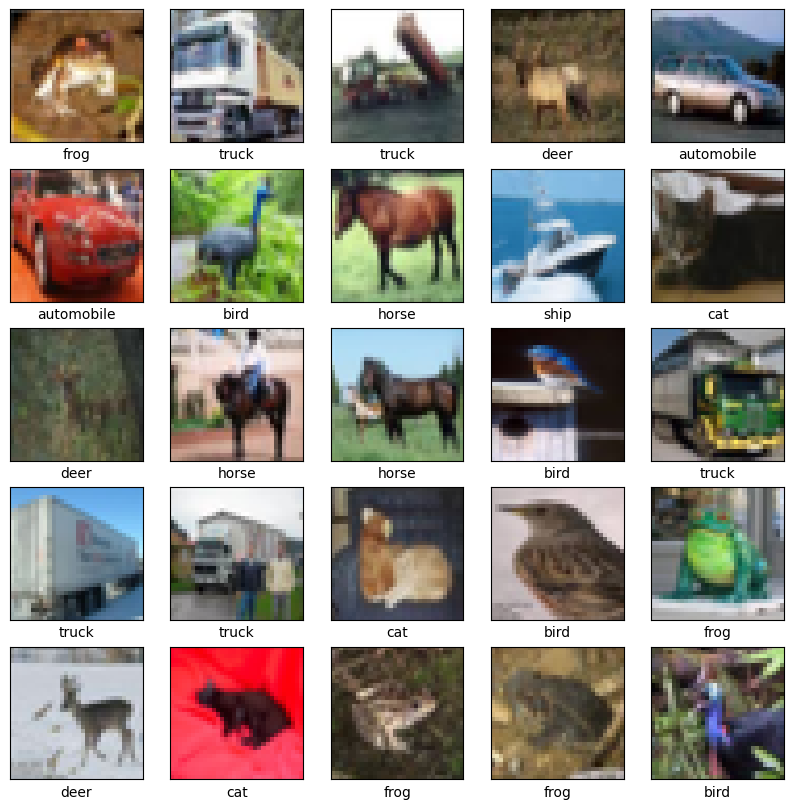

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Langkah 4 - Buat Model CNN

### Langkah 4.1. - Buat Layer Konvolusi

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

### Langkah 4.2. - Cek Arsitektur Konvolusi

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Langkah 4.3. - Tambahkan Layer Fully Connected

In [19]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

### Langkah 4.4. - Cek Arsitektur Model CNN

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

### Langkah 4.5. - Compile Model CNN

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Langkah 5 - Fit Model

In [22]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.3481 - loss: 1.7700 - val_accuracy: 0.5266 - val_loss: 1.3311
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.5651 - loss: 1.2205 - val_accuracy: 0.5949 - val_loss: 1.1345
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6302 - loss: 1.0453 - val_accuracy: 0.6294 - val_loss: 1.0520
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6734 - loss: 0.9330 - val_accuracy: 0.6748 - val_loss: 0.9367
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.6987 - loss: 0.8556 - val_accuracy: 0.6922 - val_loss: 0.8820
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.7179 - loss: 0.7969 - val_accuracy: 0.6968 - val_loss: 0.8875
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7387 - loss: 0.7501 - val_accuracy: 0.6954 - val_loss: 0.8841
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7501 -

## Langkah 6 - Evaluasi Model

313/313 - 3s - 10ms/step - accuracy: 0.6960 - loss: 0.9110


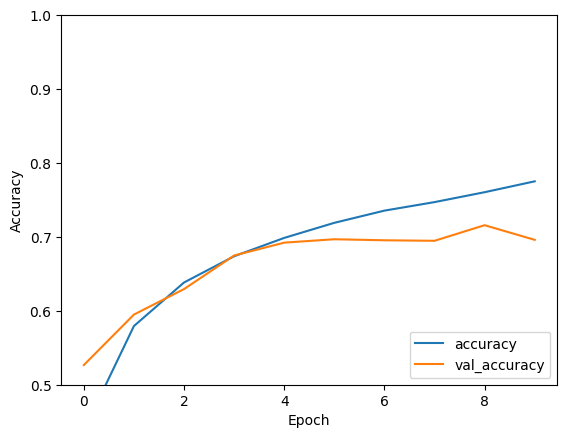

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## Langkah 7 - Cetak Hasil Akurasi

In [26]:
print(test_acc)

0.6959999799728394


# **Tugas praktikum**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,57

 Total params: 815,914 (3.11 MB)

 Trainable params: 815,018 (3.11 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 550s 347ms/step - accuracy: 0.3187 - loss: 1.9969 - val_accuracy: 0.4764 - val_loss: 1.4883
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 536s 343ms/step - accuracy: 0.5251 - loss: 1.3253 - val_accuracy: 0.6555 - val_loss: 0.9817
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 551s 353ms/step - accuracy: 0.6287 - loss: 1.0653 - val_accuracy: 0.7010 - val_loss: 0.8479
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 549s 352ms/step - accuracy: 0.6818 - loss: 0.9132 - val_accuracy: 0.7505 - val_loss: 0.7203
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 555s 355ms/step - accuracy: 0.7173 - loss: 0.8150 - val_accuracy: 0.7399 - val_loss: 0.7629
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 535s 338ms/step - accuracy: 0.7439 - loss: 0.7375 - val_accuracy: 0.7345 - val_loss: 0.7860
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 533s 341ms/step - accuracy: 0.7709 - loss: 0.6662 - val_accuracy: 0.7910 - val_loss: 0.6145
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 530s 339ms/step - ac

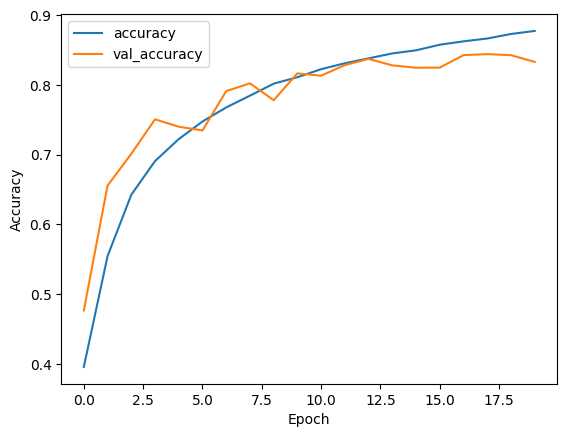

313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.8297 - loss: 0.5501
Testing Accuracy: 0.8327999711036682


In [1]:
import tensorflow as tf                   # Import TensorFlow
from tensorflow.keras import datasets, layers, models   # Import modul penting dari Keras
import matplotlib.pyplot as plt           # Untuk visualisasi grafik akurasi

# Load dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Mengunduh dan memuat dataset CIFAR-10 yang berisi 60k gambar 32x32 dalam 10 kelas

# Normalisasi
train_images, test_images = train_images / 255.0, test_images / 255.0
# Normalisasi nilai pixel dari 0-255 menjadi 0-1 agar training lebih stabil

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
# Label nama kelas untuk interpretasi hasil prediksi

model = models.Sequential([
    # BLOCK 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    # Convolution layer dengan 32 filter ukuran 3x3
    layers.BatchNormalization(),
    # Normalisasi untuk menstabilkan distribusi aktivasi
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    # Convolution layer kedua pada block 1
    layers.BatchNormalization(),
    # Normalisasi lagi
    layers.MaxPooling2D((2, 2)),
    # Pooling untuk mengecilkan ukuran fitur map
    layers.Dropout(0.25),
    # Mengurangi overfitting dengan mengacak 25% neuron

    # BLOCK 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    # Naikkan filter menjadi 64
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # BLOCK 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    # Layer conv dengan 128 filter
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    # CLASSIFIER
    layers.Flatten(),
    # Mengubah hasil conv menjadi 1 dimensi untuk masuk ke fully connected layer
    layers.Dense(256, activation='relu'),
    # Fully connected layer dengan 256 neuron
    layers.Dropout(0.5),
    # Dropout tinggi (50%) untuk mengurangi overfitting
    layers.Dense(10, activation='softmax')
    # Layer output dengan softmax untuk 10 kelas CIFAR-10
])

model.summary()
# Menampilkan arsitektur model dan jumlah parameter

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    # Optimizer Adam dengan learning rate 0.0005
    loss='sparse_categorical_crossentropy',
    # Menggunakan loss untuk label integer
    metrics=['accuracy']
    # Mengukur akurasi selama training dan testing
)

history = model.fit(
    train_images, train_labels,
    epochs=20,
    # Train model selama 20 epoch
    validation_data=(test_images, test_labels)
    # Menggunakan test set sebagai validasi
)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
# Plot grafik akurasi training dan validasi
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Menampilkan grafik

test_loss, test_acc = model.evaluate(test_images, test_labels)
# Evaluasi model pada data testing

print("Testing Accuracy:", test_acc)
# Cetak akurasi testing

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,714 (221.54 KB)

 Trainable params: 56,714 (221.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.8897 - loss: 0.3748 - val_accuracy: 0.9780 - val_loss: 0.0672
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9821 - loss: 0.0590 - val_accuracy: 0.9874 - val_loss: 0.0396
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9885 - loss: 0.0379 - val_accuracy: 0.9874 - val_loss: 0.0391
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9918 - loss: 0.0270 - val_accuracy: 0.9889 - val_loss: 0.0344
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9927 - loss: 0.0230 - val_accuracy: 0.9876 - val_loss: 0.0380


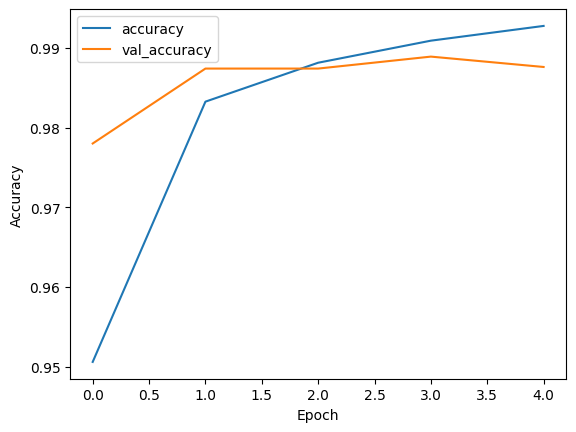

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9833 - loss: 0.0481
Testing Accuracy: 0.9876000285148621


In [2]:
import tensorflow as tf                         # Import library TensorFlow
from tensorflow.keras import datasets, layers, models   # Import modul datasets, layers, dan models dari Keras
import matplotlib.pyplot as plt                 # Import matplotlib untuk membuat grafik

# Load MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Mengunduh dan memuat dataset MNIST (gambar angka 0–9 berukuran 28x28 piksel)

# Expand dimension → dari (28,28) ke (28,28,1)
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
# Mengubah bentuk gambar training menjadi format 4D untuk Conv2D dan menormalisasi pixel (0–255 → 0–1)
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0
# Mengubah bentuk gambar testing dan menormalisasi

model = models.Sequential([
    # Layer convolution pertama dengan 16 filter berukuran 3x3
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Max pooling untuk mengurangi ukuran fitur map
    layers.MaxPooling2D((2, 2)),

    # Layer convolution kedua dengan 32 filter
    layers.Conv2D(32, (3, 3), activation='relu'),
    # Max pooling kedua
    layers.MaxPooling2D((2, 2)),

    # Flatten untuk mengubah fitur map menjadi vektor 1 dimensi
    layers.Flatten(),
    # Dense hidden layer dengan 64 neuron dan aktivasi ReLU
    layers.Dense(64, activation='relu'),
    # Output layer untuk 10 kelas angka dengan softmax
    layers.Dense(10, activation='softmax')
])

model.summary()
# Menampilkan arsitektur model dan jumlah parameter

model.compile(
    optimizer='adam',                             # Optimizer Adam untuk mempercepat training
    loss='sparse_categorical_crossentropy',       # Loss untuk label yang berupa angka (0–9)
    metrics=['accuracy']                          # Mengukur akurasi model saat training dan testing
)

history = model.fit(
    train_images, train_labels,                   # Data training dan label
    epochs=5,                                     # Melatih model selama 5 epoch
    validation_data=(test_images, test_labels)    # Data validasi menggunakan data testing
)

plt.plot(history.history['accuracy'], label='accuracy')
# Plot akurasi training di setiap epoch
plt.plot(history.history['val_accuracy'], label='val_accuracy')
# Plot akurasi validasi
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Menampilkan grafik akurasi

test_loss, test_acc = model.evaluate(test_images, test_labels)
# Mengukur performa model terhadap data testing

print("Testing Accuracy:", test_acc)
# Menampilkan akurasi testing